In [1]:
import torch
from matplotlib import pyplot as plt
import torch.nn.functional as F

FEATURE_PATH = (
    "/pasteur/u/yuhuiz/mmdebug/src/pytorch_cache/features/coco_features_vitb32.pt"
)
features = torch.load(FEATURE_PATH)
img_features, txt_features, labels = (
    torch.tensor(features["image_features"]),
    torch.tensor(features["text_features"]),
    torch.tensor(features["labels"]),
)

In [17]:
img_features = torch.load(
    "/pasteur/u/yuhuiz/multimodal_debugging/archive/trained_models/img_features_imagenet_clip_vitb32.pt"
)
txt_features = torch.load(
    "/pasteur/u/yuhuiz/multimodal_debugging/archive/trained_models/text_features_imagenet_clip_vitb32.pt"
)

torch.Size([123287, 512]) torch.Size([512]) torch.Size([123287])


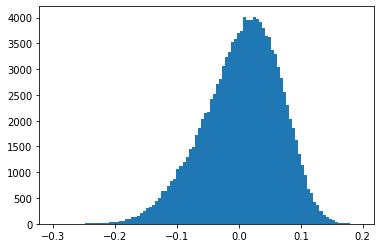

cosine similarity: 0.0046 +/- 0.0615


In [38]:
img_features, txt_features = F.normalize(img_features), F.normalize(txt_features)
gap_vec = img_features.mean(dim=0) - txt_features.mean(dim=0)
img_features_subspace = img_features - img_features.mean(dim=0)
cosines = F.cosine_similarity(img_features_subspace, gap_vec)
print(img_features_subspace.shape, gap_vec.shape, cosines.shape)
plt.hist(cosines.numpy(), bins=100)
plt.show()
print(f"cosine similarity: {cosines.mean():.4f} +/- {cosines.std():.4f}")

torch.Size([512])
mean: 0.000 +/- 0.026


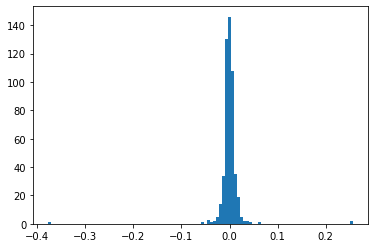

In [18]:
img_features, txt_features = F.normalize(img_features), F.normalize(txt_features)
gap_vec = img_features.mean(dim=0) - txt_features.mean(dim=0)
gap_direction = gap_vec / gap_vec.norm()

img_projection_on_gap = img_features @ gap_direction
img_features_removed_gap = (
    img_features - img_projection_on_gap[:, None] * gap_direction[None, :]
)

dimension_means = img_features_removed_gap.mean(dim=0)
print(dimension_means.shape)
plt.hist(dimension_means.numpy(), bins=100)
print(f"mean: {dimension_means.mean():.3f} +/- {dimension_means.std():.3f}")

In [9]:
(img_projection_on_gap[:, None] * gap_direction[None, :]).shape

torch.Size([123287, 512])

# No normalization

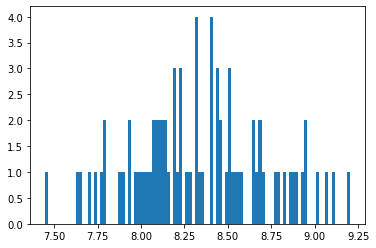

norm: 8.3357 +/- 0.3824


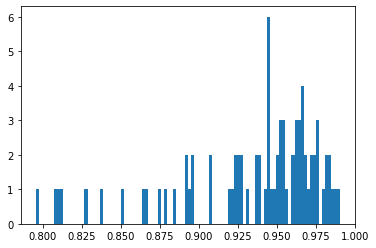

cosine similarity: 0.9340 +/- 0.0468


In [2]:
img_features, txt_features, labels = (
    torch.tensor(features["image_features"]),
    torch.tensor(features["text_features"]),
    torch.tensor(features["labels"]),
)

gaps = []
for i in range(len(labels[0])):
    idxs = [j for j in range(len(labels)) if labels[j][i] == 1]
    gap = img_features[idxs].mean(0) - txt_features[idxs].mean(0)
    gaps.append(gap)

gaps = torch.stack(gaps)

norms = gaps.norm(dim=-1)
plt.hist(norms.numpy(), bins=100)
plt.show()
print(f"norm: {norms.mean():.4f} +/- {norms.std():.4f}")

gap_directions = F.normalize(gaps)
mean_gap_direciton = F.normalize(gap_directions.mean(0), dim=-1)
cossims = gap_directions @ mean_gap_direciton
plt.hist(cossims.numpy(), bins=100)
plt.show()
print(f"cosine similarity: {cossims.mean():.4f} +/- {cossims.std():.4f}")

# Normalization

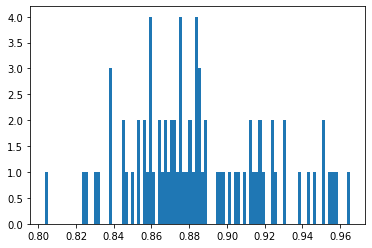

norm: 0.8853 +/- 0.0359


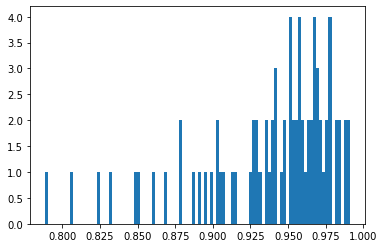

cosine similarity: 0.9377 +/- 0.0447


In [3]:
img_features, txt_features, labels = (
    F.normalize(torch.tensor(features["image_features"])),  # Difference here!!!
    F.normalize(torch.tensor(features["text_features"])),  # Difference here!!!
    torch.tensor(features["labels"]),
)

gaps = []
for i in range(len(labels[0])):
    idxs = [j for j in range(len(labels)) if labels[j][i] == 1]
    gap = img_features[idxs].mean(0) - txt_features[idxs].mean(0)
    gaps.append(gap)

gaps = torch.stack(gaps)

norms = gaps.norm(dim=-1)
plt.hist(norms.numpy(), bins=100)
plt.show()
print(f"norm: {norms.mean():.4f} +/- {norms.std():.4f}")


gap_directions = F.normalize(gaps)
mean_gap_direciton = F.normalize(gap_directions.mean(0), dim=-1)
cossims = gap_directions @ mean_gap_direciton
plt.hist(cossims.numpy(), bins=100)
plt.show()
print(f"cosine similarity: {cossims.mean():.4f} +/- {cossims.std():.4f}")

# Normalization + Renormalization

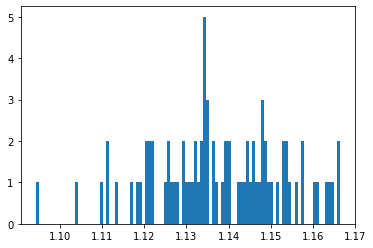

norm: 1.1376 +/- 0.0153


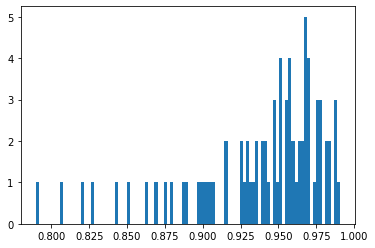

cosine similarity: 0.9375 +/- 0.0449


In [4]:
img_features, txt_features, labels = (
    F.normalize(torch.tensor(features["image_features"])),
    F.normalize(torch.tensor(features["text_features"])),
    torch.tensor(features["labels"]),
)

gaps = []
for i in range(len(labels[0])):
    idxs = [j for j in range(len(labels)) if labels[j][i] == 1]
    gap = F.normalize(img_features[idxs].mean(0), dim=0) - F.normalize(
        txt_features[idxs].mean(0), dim=0
    )  # Difference here!!!
    gaps.append(gap)

gaps = torch.stack(gaps)

norms = gaps.norm(dim=-1)
plt.hist(norms.numpy(), bins=100)
plt.show()
print(f"norm: {norms.mean():.4f} +/- {norms.std():.4f}")

gap_directions = F.normalize(gaps)
mean_gap_direciton = F.normalize(gap_directions.mean(0), dim=-1)
cossims = gap_directions @ mean_gap_direciton
plt.hist(cossims.numpy(), bins=100)
plt.show()
print(f"cosine similarity: {cossims.mean():.4f} +/- {cossims.std():.4f}")

# Normalization + Individual Gap

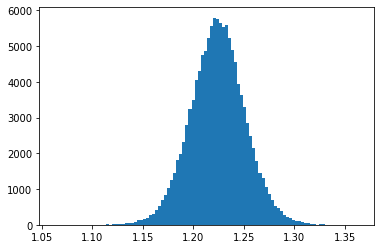

norm: 1.2243 +/- 0.0270


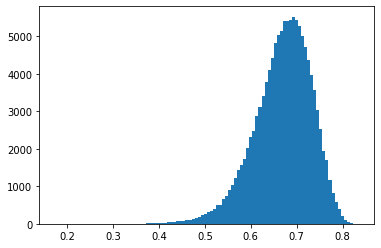

cosine similarity: 0.6694 +/- 0.0623


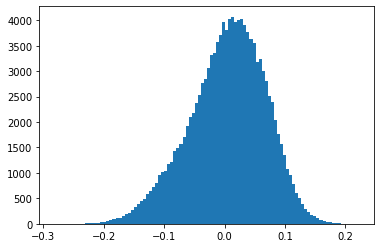

cosine similarity: 0.0045 +/- 0.0627


In [6]:
img_features, txt_features, labels = (
    F.normalize(torch.tensor(features["image_features"])),
    F.normalize(torch.tensor(features["text_features"])),
    torch.tensor(features["labels"]),
)

gaps = img_features - txt_features

norms = gaps.norm(dim=-1)
plt.hist(norms.numpy(), bins=100)
plt.show()
print(f"norm: {norms.mean():.4f} +/- {norms.std():.4f}")

gap_directions = F.normalize(gaps)
mean_gap_direciton = F.normalize(gap_directions.mean(0), dim=-1)
cossims = gap_directions @ mean_gap_direciton
plt.hist(cossims.numpy(), bins=100)
plt.show()
print(f"cosine similarity: {cossims.mean():.4f} +/- {cossims.std():.4f}")


img_features_subspace = img_features - img_features.mean(0)
cossims = F.normalize(img_features_subspace) @ mean_gap_direciton
plt.hist(cossims.numpy(), bins=100)
plt.show()
print(f"cosine similarity: {cossims.mean():.4f} +/- {cossims.std():.4f}")

# Orthogonal

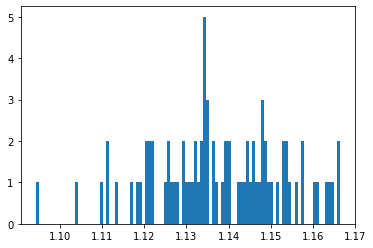

norm: 1.1376 +/- 0.0153


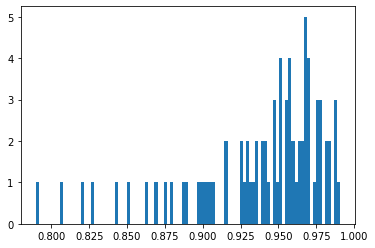

cosine similarity: 0.9375 +/- 0.0449


In [9]:
img_features, txt_features, labels = (
    F.normalize(torch.tensor(features["image_features"])),
    F.normalize(torch.tensor(features["text_features"])),
    torch.tensor(features["labels"]),
)

gaps = []
for i in range(len(labels[0])):
    idxs = [j for j in range(len(labels)) if labels[j][i] == 1]
    gap = F.normalize(img_features[idxs].mean(0), dim=0) - F.normalize(
        txt_features[idxs].mean(0), dim=0
    )  # Difference here!!!
    gaps.append(gap)

gaps = torch.stack(gaps)

norms = gaps.norm(dim=-1)
plt.hist(norms.numpy(), bins=100)
plt.show()
print(f"norm: {norms.mean():.4f} +/- {norms.std():.4f}")

gap_directions = F.normalize(gaps)
mean_gap_direciton = F.normalize(gap_directions.mean(0), dim=-1)
cossims = gap_directions @ mean_gap_direciton
plt.hist(cossims.numpy(), bins=100)
plt.show()
print(f"cosine similarity: {cossims.mean():.4f} +/- {cossims.std():.4f}")

tensor([1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]) tensor([1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]) tensor(1.0000)


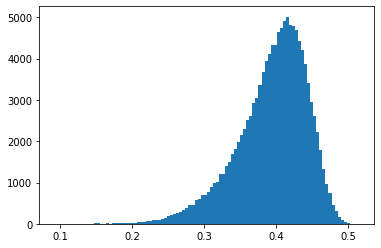

img dot product: 0.3946 +/- 0.0482


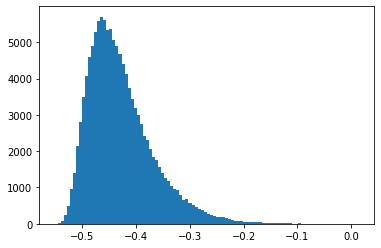

txt dot product: -0.4283 +/- 0.0606


In [17]:
print(img_features.norm(dim=-1), txt_features.norm(dim=-1), mean_gap_direciton.norm())

dot_product = img_features @ mean_gap_direciton
plt.hist(dot_product.numpy(), bins=100)
plt.show()
print(f"img dot product: {dot_product.mean():.4f} +/- {dot_product.std():.4f}")

dot_product = txt_features @ mean_gap_direciton
plt.hist(dot_product.numpy(), bins=100)
plt.show()
print(f"txt dot product: {dot_product.mean():.4f} +/- {dot_product.std():.4f}")

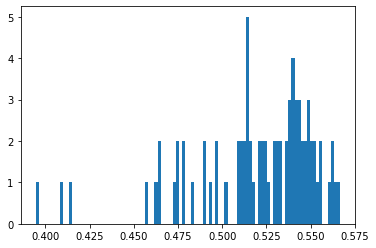

img dot product: 0.5195 +/- 0.0352


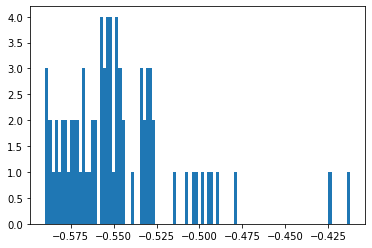

img dot product: -0.5475 +/- 0.0331


In [19]:
img_centers, txt_centers = [], []
for i in range(len(labels[0])):
    idxs = [j for j in range(len(labels)) if labels[j][i] == 1]
    img_centers.append(F.normalize(img_features[idxs].mean(0), dim=0))
    txt_centers.append(F.normalize(txt_features[idxs].mean(0), dim=0))

img_centers = torch.stack(img_centers)
dot_product = img_centers @ mean_gap_direciton
plt.hist(dot_product.numpy(), bins=100)
plt.show()
print(f"img dot product: {dot_product.mean():.4f} +/- {dot_product.std():.4f}")

txt_centers = torch.stack(txt_centers)
dot_product = txt_centers @ mean_gap_direciton
plt.hist(dot_product.numpy(), bins=100)
plt.show()
print(f"img dot product: {dot_product.mean():.4f} +/- {dot_product.std():.4f}")

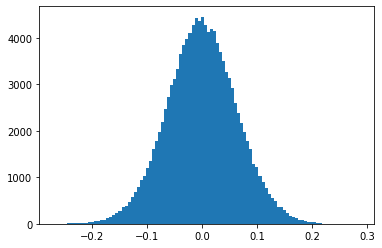

img dot product: -0.0001 +/- 0.0635


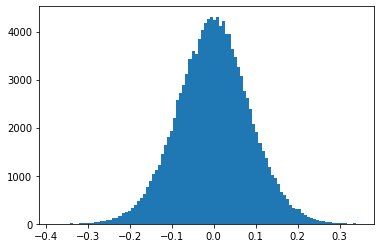

txt dot product: -0.0000 +/- 0.0863


In [24]:
dot_product = F.normalize(img_features[1:] - img_features[:-1]) @ mean_gap_direciton
plt.hist(dot_product.numpy(), bins=100)
plt.show()
print(f"img dot product: {dot_product.mean():.4f} +/- {dot_product.std():.4f}")

dot_product = F.normalize(txt_features[1:] - txt_features[:-1]) @ mean_gap_direciton
plt.hist(dot_product.numpy(), bins=100)
plt.show()
print(f"txt dot product: {dot_product.mean():.4f} +/- {dot_product.std():.4f}")

# Other Features

In [5]:
import numpy as np
import torch
import torch.nn.functional as F
from matplotlib import pyplot as plt

features = np.load(
    "/afs/cs.stanford.edu/u/yuhuiz/develop/neurips_modality_gap/Modality-Gap-UAI2022/Figure_1_Modality_Gap/features_convirt.npy"
)

torch.Size([500, 512]) torch.Size([512]) torch.Size([500])


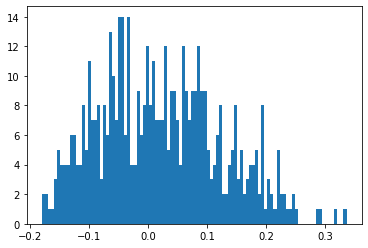

cosine similarity: 0.0198 +/- 0.1031


In [6]:
img_features, txt_features = torch.tensor(features[0]), torch.tensor(features[1])
img_features, txt_features = F.normalize(img_features), F.normalize(txt_features)
gap_vec = (img_features - txt_features).mean(dim=0)
img_features_subspace = img_features - img_features.mean(dim=0)
cosines = F.cosine_similarity(img_features_subspace, gap_vec)
print(img_features_subspace.shape, gap_vec.shape, cosines.shape)
plt.hist(cosines.numpy(), bins=100)
plt.show()
print(f"cosine similarity: {cosines.mean():.4f} +/- {cosines.std():.4f}")

torch.Size([512])
mean: 0.000 +/- 0.016


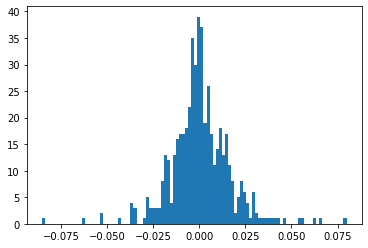

In [7]:
img_features, txt_features = torch.tensor(features[0]), torch.tensor(features[1])
img_features, txt_features = F.normalize(img_features), F.normalize(txt_features)
gap_vec = img_features.mean(dim=0) - txt_features.mean(dim=0)
gap_direction = gap_vec / gap_vec.norm()

img_projection_on_gap = img_features @ gap_direction
img_features_removed_gap = (
    img_features - img_projection_on_gap[:, None] * gap_direction[None, :]
)

dimension_means = img_features_removed_gap.mean(dim=0)
print(dimension_means.shape)
plt.hist(dimension_means.numpy(), bins=100)
print(f"mean: {dimension_means.mean():.3f} +/- {dimension_means.std():.3f}")